# RIDGE REGRESSION (L2 REGULARIZATION)

## 1. Definition
**Ridge Regression** (also called Tikhonov regularization) is a regularized version of Linear Regression that adds a **penalty term** to the cost function to handle multicollinearity and prevent overfitting.

* **Key Concept:** It shrinks the coefficients ($\beta$) towards zero, but (unlike Lasso) **never makes them exactly zero**.

---

## 2. The Cost Function (Math)

Ridge modifies the standard Mean Squared Error (MSE) by adding an **L2 Penalty** (squared magnitude of coefficients).

$$J(\beta) = \underbrace{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}_{\text{MSE}} + \underbrace{\lambda \sum_{j=1}^{k} \beta_j^2}_{\text{L2 Penalty}}$$

* **$\lambda$ (Lambda):** The hyperparameter controlling the penalty strength.
* **$\beta^2$:** Squaring the coefficient means outliers (large weights) are punished extremely heavily.

---

## 3. The Closed-Form Solution (The Math Trick)

Unlike Lasso (which needs iterative solvers), Ridge can be solved mathematically in one step. This is the **secret** to how it fixes multicollinearity.

**Standard Linear Regression:**
$$\beta = (X^T X)^{-1} X^T Y$$
* *Problem:* If columns in $X$ are correlated, $(X^T X)$ becomes a "singular matrix" (determinant is 0) and cannot be inverted. The code crashes or gives wild errors.

**Ridge Regression:**
$$\beta = (X^T X + \lambda I)^{-1} X^T Y$$
* *Solution:* We add $\lambda$ to the diagonal of the matrix ($I$ is the Identity Matrix). This makes the matrix invertible again, stabilizing the calculations.

---

## 4. Why Use It? (The Problems Solved)

### A. Multicollinearity
When features are highly correlated ( "Weight in Kg" and "Weight in Lbs"), standard regression fails because it can't decide which feature gets the credit.
* **Ridge's Fix:** It spreads the coefficient weight equally among the correlated features, rather than arbitrarily picking one.

### B. Overfitting (Variance Reduction)
* **Standard Regression:** Low Bias, High Variance (fits noise).
* **Ridge Regression:** Slightly Higher Bias, **Much Lower Variance** (generalizes better).



---

## 5. Geometric Intuition

Imagine the constraint region for the coefficients.
* **Ridge Constraint:** $\sum \beta^2 \le c$. This forms a **Circle** (or Hypersphere).
* The error contours touch the circle. Unlike the Diamond (Lasso), the circle has no sharp corners on the axes.
* **Result:** The coefficients get very close to zero, but practically never hit zero exactly.

---

## 6. Effect of Lambda ($\lambda$)

| $\lambda$ Value | Effect on Model | Result |
| :--- | :--- | :--- |
| **0** | No penalty | Same as Standard Linear Regression. |
| **Small (0.1)** | Slight shrinkage | Reduces variance slightly. |
| **Optimal** | Balanced | Best Generalization. |
| **Large (100)** | Heavy shrinkage | Coefficients $\approx$ 0. Model becomes a flat line (Underfitting). |

---

## 7. Critical Requirement: Feature Scaling

**Mandatory for Ridge.**
Because the penalty is based on the *squared* value of the weights ($\beta^2$), features with large scales ( House Price in millions) will dominate the penalty term compared to small features ( Number of Rooms).
* **Action:** You **must** use `StandardScaler` or `MinMaxScaler` before training.

---

## 8. Summary: Ridge vs. Lasso

| Feature | Ridge (L2) | Lasso (L1) |
| :--- | :--- | :--- |
| **Equation** | $+ \lambda \sum \beta^2$ | $+ \lambda \sum |\beta|$ |
| **Outcome** | Shrinks coeffs near 0 | Shrinks coeffs **to** 0 |
| **Selection** | Keeps all features | Deletes features (Feature Selection) |
| **Solvability** | Exact Math Solution | Needs Iterative Solver |
| **Use When** | All features are likely useful (Dense) | You suspect many features are useless (Sparse) |

---

# Applications of L2 Regularization (Ridge)

## 1. Ridge Regression (Linear Models)
This is the primary application of L2 regularization in regression tasks.

* **Goal:** To prevent overfitting while keeping all features in the model.
* **Mechanism:** It adds the squared value of coefficients ($\beta^2$) to the cost function.
* **Result:** It **shrinks** the coefficients uniformly towards zero but never sets them exactly to zero.
* **Best For:** **Dense Models** where you believe every input feature has at least *some* effect on the output ( predicting house prices where location, size, and age all matter).



---

## 2. Handling Multicollinearity
Ridge is the standard solution when independent variables are highly correlated.

* **The Problem:** In standard regression, if two features are twins ( "Height in cm" and "Height in inches"), the math breaks down (singular matrix), and coefficients explode in opposite directions (+1000, -1000).
* **Ridge Solution:** The L2 penalty forces the coefficients to be spread out. Instead of one feature taking all the credit, Ridge assigns them equal, smaller weights.
* **Outcome:** A stable model that doesn't crash on correlated data.

---

## 3. Logistic Regression with L2
L2 is the **default** regularization used in most Logistic Regression implementations (like Scikit-Learn).

* **Goal:** To smooth the decision boundary in classification.
* **Why?** Without regularization, if a dataset is perfectly separable, Logistic Regression tries to push weights to infinity to achieve 100% confidence.
* **L2 Effect:** It keeps the weights finite, ensuring the decision boundary is not overly sharp or sensitive to a single outlier point.



---

## 4. Neural Networks (Weight Decay)
In the context of Deep Learning, L2 Regularization is almost always referred to as **"Weight Decay."**

* **Goal:** To prevent the neural network from memorizing the training data (overfitting).
* **Mechanism:** During backpropagation, the L2 term pushes the weights of neurons to stay small.
* **Benefit:** Small weights mean that a small change in the input (noise) won't cause a massive change in the output. This makes the network **robust** and stable.

---

## 5. Summary: When to Apply L2?

| Scenario | Why L2 is the Best Choice |
| :--- | :--- |
| **All Features Matter** | You have domain knowledge that *every* input is relevant ( medical vitals). You don't want to delete any data. |
| **Correlated Data** | You have inputs that move together ( Stock Market indicators). Ridge handles this stability better than Lasso. |
| **Small Data, Many Features** | When $p > n$ (more features than samples), standard regression fails. Ridge provides a mathematical solution to make it solvable. |
| **Standard Baseline** | L2 is generally safer to try *first* than Lasso, as it is less aggressive in removing information. |

Ridge Regression Results:
MSE: 150318988.6722909
R2 Score: 0.7687400174272447
Coefficients: [53377.15806585 16428.61292246  1215.32613333 20517.11306955]
Intercept: 244687.5

Best Lambda (alpha): 0.01


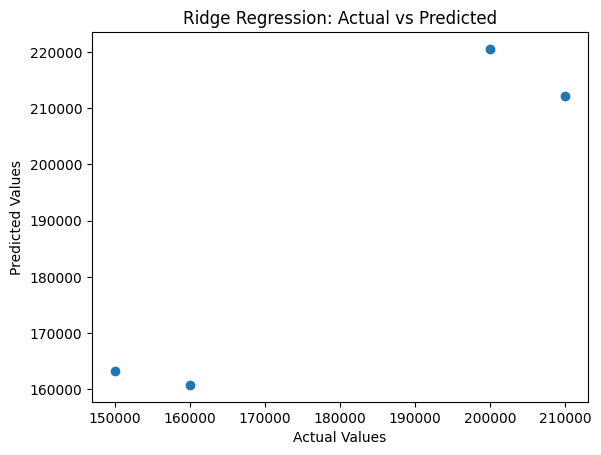

In [5]:


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt



df = pd.read_csv("data.csv")


X = df.drop("Price", axis=1)
y = df["Price"]





X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


ridge = Ridge(alpha=1.0)   # regularization strength (lambda)
ridge.fit(X_train_scaled, y_train)


y_pred = ridge.predict(X_test_scaled)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Ridge Regression Results:")
print("MSE:", mse)
print("R2 Score:", r2)
print("Coefficients:", ridge.coef_)
print("Intercept:", ridge.intercept_)


lambdas = [0.01, 0.1, 1, 10, 100, 500]

ridge_cv = RidgeCV(alphas=lambdas, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train_scaled, y_train)

print("\nBest Lambda (alpha):", ridge_cv.alpha_)


plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Ridge Regression: Actual vs Predicted")
plt.show()
